### General approach to running these classifiers
- Get data and labels ready, normalize inputs, ensure balanced classes
- Feed in NxD training matrix into M hidden layers
- This is done by multiplying data with DxM weight matrix and running an activation function on each element (adding bias term)
- Feed the output of the activation into a ZxK matrix, where K is number of classes, use another activation
- Determine dominant class for each row with softmax
- Compare predicted classifications with known labels
- Calculate cross-entropy!
- Do the gradient descent step to update the Z weights
- Using these weights and the Z activations, update the weights of the initial layer
- Epoch complete, now do it again!

In [1]:
# Need to first load up the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def get_data():
    df = pd.read_csv('ecommerce_data.csv')
    
    data = df.as_matrix()
    
    X = data[:,:-1]
    Y = data[:,-1]
    
    # normalize columns 1 and 2
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()
    
    # Create a new matrix X2 with the correct number of columns
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)]
    
    # one-hot the last categorical column
    for i in range(N):
        X2[i,(D-1) + X[i,D-1]] = 1
    
    return X2, Y

def get_binary_data():
    X, Y = get_data()
    X2 = X[Y <= 1]
    Y2 = Y[Y <= 1]
    return X2, Y2

In [13]:
# just forward evaluating a basic multi-class neural net

X, Y = get_data()
M = 5
D = X.shape[1]
K = len(set(Y))
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

def softmax(A):
    expA = np.exp(A)
    return expA/expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2)

P_Y_given_X = forward(X, W1, b1, W2, b2)
predictions = np.argmax(P_Y_given_X, axis=1)

def classification_rate(predictions, actual):
    return np.mean(predictions == actual)

print("Classification rate: ", classification_rate(predictions, Y))


Classification rate:  0.188


/Users/admin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [25]:
# Training logistic regression with softmax
from sklearn.utils import shuffle

def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)
D = X.shape[1]
K = len(set(Y))

Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)

/Users/admin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [60]:
# Now we want to train logistic regression with softmax
from sklearn.utils import shuffle

def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
        
    return ind
        
    
# Get data, split into train and test sets

# softmax
# forward
# predict
# classification_rate
# cross_entropy

# loop through training, plot costs and classification rates

X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)
D = X.shape[1]
K = len(set(Y))

# keep just the last 100 points for test
Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)

Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest, K)

W = np.random.randn(D, K)
b = np.zeros(K)

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W, b):
    return softmax(X.dot(W) + b)

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

def classification_rate(P, Y):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))

train_costs = []
test_costs = []
learning_rate = 0.0001
epochs = 100000
for i in range(epochs):
    pYtrain = forward(Xtrain, W, b)
    pYtest = forward(Xtest, W, b)
    
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W -= learning_rate*Xtrain.T.dot(pYtrain - Ytrain_ind)
    b -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print("Final train classificatino_rate:", classification_rate(predict(pYtrain), Ytrain))
print("Final test classification_rate:", classification_rate(predict(pYtest), Ytest))

/Users/admin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0 0.720054687838 0.704645346043
1000 0.12189359078 0.121238680278
2000 0.110643846628 0.101240715099
3000 0.105446744534 0.0919370510107
4000 0.102142041563 0.0864118742749
5000 0.0997769185078 0.0827242829596
6000 0.0979799090421 0.0800693551974
7000 0.0965634920584 0.0780512525578
8000 0.0954181292414 0.076453943082
9000 0.0944738762311 0.075150302232
10000 0.0936833648606 0.0740608780503
11000 0.0930131408077 0.0731334328732
12000 0.0924388103611 0.0723321007323
13000 0.0919421285631 0.0716313266286
14000 0.0915091607276 0.0710123193754
15000 0.0911290746642 0.0704608880849
16000 0.0907933213772 0.0699660719661
17000 0.0904950642515 0.0695192422218
18000 0.0902287722247 0.0691134947786
19000 0.0899899240801 0.0687432280477
20000 0.0897747897748 0.068403841963
21000 0.0895802662489 0.0680915187156
22000 0.0894037524512 0.0678030599014
23000 0.0892430530418 0.0675357635027
24000 0.0890963033637 0.0672873295673
25000 0.0889619103924 0.0670557869291
26000 0.0888385058299 0.0668394356053

[]

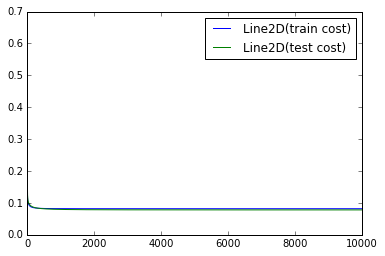

In [59]:
legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.plot()

In [109]:
# Now do the same thing for a neural net!

def y2indicator(Y, K):
    N = len(Y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i,Y[i]] = 1
    return ind

# Get the data
X, Y = get_data()
X, Y = shuffle(X, Y)

N, D = X.shape
M = 5
K = len(set(Y))

# shuffle, split data into train or test sets
Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)

Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest, K)

# initialize our weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

# define our functions, y2indicator, softmax, forward, predict, classification_rate, cross_entrpy
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

def classification_rate(pY, Y):
    return np.mean(pY == Y)

def cross_enropy(T, pY):
    return -np.mean(T * np.log(pY))

# run through training loop
epochs = 10000
train_costs = []
test_costs = []
learning_rate = 0.0005
for i in range(epochs):
    pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    pYtest, Ztest = forward(Xtest, W1, b1, W2, b2)
    
    # see how we'll we're doing on ith epoch
    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    # Update some weights with gradient descent!!
    W2 -= learning_rate*Ztrain.T.dot(pYtrain - Ytrain_ind)
    b2 -= learning_rate*(pYtrain - Ytrain_ind).sum()
    dZ = (pYtrain - Ytrain_ind).dot(W2.T) * (1 - Ztrain*Ztrain)
    W1 -= learning_rate * Xtrain.T.dot(dZ)
    b1 -= learning_rate*dZ.sum(axis=0)
    if i % 1000 == 0:
        print(i, ctrain, ctest)
        
print("Final train classification_rate:", classification_rate(Ytrain, predict(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, predict(pYtest)))

/Users/admin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/admin/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0 0.898427406704 0.918650180872
1000 0.0667255495698 0.0759144442573
2000 0.0551437773807 0.0692588162976
3000 0.0471378784893 0.0637843037948
4000 0.0420460068458 0.0634696498199
5000 0.038368043296 0.0614379362105
6000 0.0345570303757 0.0585657696218
7000 0.0315169195374 0.0594360033659
8000 0.0298231906571 0.0562131362223
9000 0.0286928951829 0.0533347998502
Final train classification_rate: 0.955
Final test classification_rate: 0.94


[]

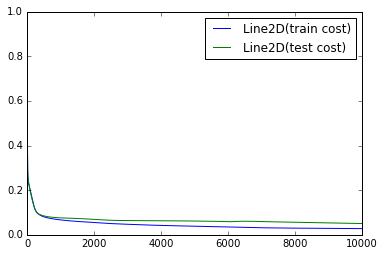

In [110]:
legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.plot()

In [ ]:
# Dope!!